In [1]:
#slideshow config for RISE slideshow https://rise.readthedocs.io/en/maint-5.5/customize.html#how-to-customize

#!/usr/bin/env python3
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "sky",
        "transition": "zoom",
        "start_slideshow_at": "beginning",
        "autolaunch": true
     }
)

{'theme': 'sky', 'transition': 'zoom', 'start_slideshow_at': 'selected'}

In [ ]:
!pip3 install jupyter_contrib_nbextensions
!jupyter contrib nbextension install

  Using cached https://files.pythonhosted.org/packages/f3/a1/1e07cedcb554408fefe4a7d32b2a041c86517167aec6ca8251c808ef6c1e/notebook-6.0.1-py3-none-any.whl
  Stored in directory: C:\Users\PairviewUser\AppData\Local\pip\Cache\wheels\15\df\fe\2a74fe34709e7fdc5ae153a768675d9fda93cc7d5133ed1fb0
  Stored in directory: C:\Users\PairviewUser\AppData\Local\pip\Cache\wheels\0d\71\2a\164491997299b9f2479a251e254323fe35d946779e18f27956
  Stored in directory: C:\Users\PairviewUser\AppData\Local\pip\Cache\wheels\1c\54\34\fd47cd9b308826cc4292b54449c1899a30251ef3b506bc91ea
  Stored in directory: C:\Users\PairviewUser\AppData\Local\pip\Cache\wheels\98\b0\dd\29e28ff615af3dda4c67cab719dd51357597eabff926976b45
Successfully built jupyter-nbextensions-configurator jupyter-latex-envs prometheus-client backcall


You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
# !pip install RISE #one time-set up for creating Jupyter slideshows

## Step 1: Describe the problem

from https://ibmdecisionoptimization.github.io/tutorials/html/Scheduling_Tutorial.html

The first step in modeling the problem is to write a natural language description of the problem, identifying the decision variables and the constraints on these variables.

Writing a natural language description of this problem requires to answer these questions:

- What is the known information in this problem ?
- What are the decision variables or unknowns in this problem ?
- What are the constraints on these variables ?
- What is the objective ?

_What is the known information in this problem ?_

There are ten house building tasks, each with a given duration. For each task, there is a list of tasks that must be completed before the task can start. Some tasks also have costs associated with an early start date or late end date.

_What are the decision variables or unknowns in this problem ?_

The unknowns are the date that each task will start. The cost is determined by the assigned start dates.

_What are the constraints on these variables ?_

In this case, each constraint specifies that a particular task may not begin until one or more given tasks have been completed.

_What is the objective ?_

The objective is to minimize the cost incurred through earliness and tardiness costs.

## Step 2: Model Setup

When using a cloud solving solution, the following attributes must be set with appropriate values:

In [2]:
url = None
key = None

### Declaration of engine
A scheduling model starts with the declaration of the engine as follows:

In [3]:
# !pip install docplex #one time-set up

In [4]:
import sys
from docplex.cp.model import *

In [16]:
#check environment

from docplex.mp.environment import Environment
env = Environment()
env.print_information()

* system is: Windows 64bit
* Python version 3.7.4, located at: C:\Users\PairviewUser\Anaconda3\python.exe
* docplex is present, version is (2, 10, 155)
* CPLEX library is present, version is 12.9.0.1, located at: C:\Users\PairviewUser\Anaconda3\lib\site-packages
* pandas is present, version is 0.25.1


In [5]:
# A scheduling model starts with the creation of the model container, as follows
mdl1 = CpoModel()

## Step 3: Declare the interval variables
In the model, each task is represented by an interval variables. Each variable represents the unknown information, the scheduled interval for each activity. After the model is executed, the values assigned to these interval variables will represent the solution to the problem.

The declaration of necessary interval variables is done as follows:

| Task | Duration | Preceding tasks |
| --- | --- | --- |
| masonry | 35 |  |
| capentry | 15 | masonry |
| COMPLETE THIS 

In [6]:
masonry = mdl1.interval_var(size=35)
carpentry = mdl1.interval_var(size=15)
plumbing = mdl1.interval_var(size=40)
ceiling = mdl1.interval_var(size=15)
roofing = mdl1.interval_var(size=5)
painting = mdl1.interval_var(size=10)
windows = mdl1.interval_var(size=5)
facade = mdl1.interval_var(size=10)
garden = mdl1.interval_var(size=5)
moving = mdl1.interval_var(size=5)

## Step 4: Add the precedence constraints

In this example, certain tasks can start only after other tasks have been completed. CP Optimizer allows to express constraints involving temporal relationships between pairs of interval variables using precedence constraints.

Precedence constraints are used to specify when an interval variable must start or end with respect to the start or end time of another interval variable.

The following types of precedence constraints are available; if a and b denote interval variables, both interval variables are present, and delay is a number or integer expression (0 by default), then:

end_before_end(a, b, delay) constrains at least the given delay to elapse between the end of a and the end of b. It imposes the inequality endTime(a) + delay <= endTime(b).
end_before_start(a, b, delay) constrains at least the given delay to elapse between the end of a and the start of b. It imposes the inequality endTime(a) + delay <= startTime(b).
end_at_end(a, b, delay) constrains the given delay to separate the end of a and the end of ab. It imposes the equality endTime(a) + delay == endTime(b).
end_at_start(a, b, delay) constrains the given delay to separate the end of a and the start of b. It imposes the equality endTime(a) + delay == startTime(b).
start_before_end(a, b, delay) constrains at least the given delay to elapse between the start of a and the end of b. It imposes the inequality startTime(a) + delay <= endTime(b).
start_before_start(a, b, delay) constrains at least the given delay to elapse between the start of act1 and the start of act2. It imposes the inequality startTime(a) + delay <= startTime(b).
start_at_end(a, b, delay) constrains the given delay to separate the start of a and the end of b. It imposes the equality startTime(a) + delay == endTime(b).
start_at_start(a, b, delay) constrains the given delay to separate the start of a and the start of b. It imposes the equality startTime(a) + delay == startTime(b).
If either interval a or b is not present in the solution, the constraint is automatically satisfied, and it is as if the constraint was never imposed.

For our model, precedence constraints can be added with the following code:

In [7]:
mdl1.add( mdl1.end_before_start(masonry, carpentry) )
mdl1.add( mdl1.end_before_start(masonry, plumbing) )
mdl1.add( mdl1.end_before_start(masonry, ceiling) )
mdl1.add( mdl1.end_before_start(carpentry, roofing) )
mdl1.add( mdl1.end_before_start(ceiling, painting) )
mdl1.add( mdl1.end_before_start(roofing, windows) )
mdl1.add( mdl1.end_before_start(roofing, facade) )
mdl1.add( mdl1.end_before_start(plumbing, facade) )
mdl1.add( mdl1.end_before_start(roofing, garden) )
mdl1.add( mdl1.end_before_start(plumbing, garden) )
mdl1.add( mdl1.end_before_start(windows, moving) )
mdl1.add( mdl1.end_before_start(facade, moving) )
mdl1.add( mdl1.end_before_start(garden, moving) )
mdl1.add( mdl1.end_before_start(painting, moving) )

## Step 5: Add the objective

The objective function to be minimized can be written as follows:

In [8]:
obj = mdl1.minimize(  400 * mdl1.max([mdl1.end_of(moving) - 100, 0]) 
                    + 200 * mdl1.max([25 - mdl1.start_of(masonry), 0]) 
                    + 300 * mdl1.max([75 - mdl1.start_of(carpentry), 0]) 
                    + 100 * mdl1.max([75 - mdl1.start_of(ceiling), 0]) )
mdl1.add(obj)

## Step 6: Solve the model and display the solution

In [9]:
# Solve the model
print("\nSolving model....")
msol1 = mdl1.solve(url=url, key=key, TimeLimit=20)
print("done")


Solving model....
done


In [10]:
print("Cost will be " + str(msol1.get_objective_values()[0]))

Cost will be 5000


In [11]:
var_sol = msol1.get_var_solution(masonry)
print("Masonry : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol1.get_var_solution(carpentry)
print("Carpentry : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol1.get_var_solution(plumbing)
print("Plumbing : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol1.get_var_solution(ceiling)
print("Ceiling : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol1.get_var_solution(roofing)
print("Roofing : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol1.get_var_solution(painting)
print("Painting : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol1.get_var_solution(windows)
print("Windows : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol1.get_var_solution(facade)
print("Facade : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol1.get_var_solution(moving)
print("Moving : {}..{}".format(var_sol.get_start(), var_sol.get_end()))

Masonry : 20..55
Carpentry : 75..90
Plumbing : 55..95
Ceiling : 75..90
Roofing : 90..95
Painting : 90..100
Windows : 95..100
Facade : 95..105
Moving : 105..110


Graphical display of the same result is available with:

In [14]:
#setting up graphical display
import docplex.cp.utils_visu as visu
import matplotlib.pyplot as plt
%matplotlib inline
#Change the plot size
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

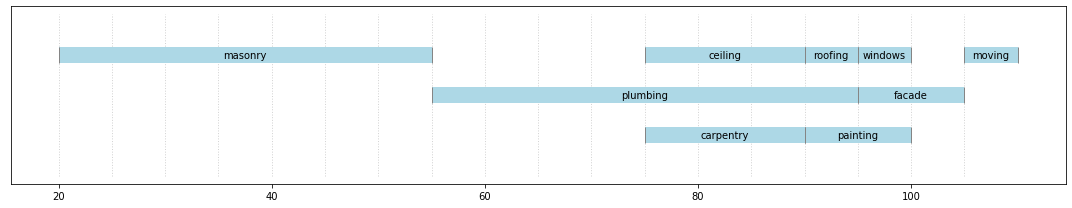

In [15]:
wt = msol1.get_var_solution(masonry)   
visu.interval(wt, 'lightblue', 'masonry')   
wt = msol1.get_var_solution(carpentry)   
visu.interval(wt, 'lightblue', 'carpentry')
wt = msol1.get_var_solution(plumbing)   
visu.interval(wt, 'lightblue', 'plumbing')
wt = msol1.get_var_solution(ceiling)   
visu.interval(wt, 'lightblue', 'ceiling')
wt = msol1.get_var_solution(roofing)   
visu.interval(wt, 'lightblue', 'roofing')
wt = msol1.get_var_solution(painting)   
visu.interval(wt, 'lightblue', 'painting')
wt = msol1.get_var_solution(windows)   
visu.interval(wt, 'lightblue', 'windows')
wt = msol1.get_var_solution(facade)   
visu.interval(wt, 'lightblue', 'facade')
wt = msol1.get_var_solution(moving)   
visu.interval(wt, 'lightblue', 'moving')
visu.show()

The overall cost is 5000 and moving will be completed by day 110.